## Test GP emulator

In [1]:
%matplotlib notebook
import gp_emulator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from matplotlib import cm

In [2]:
basedir='../../p1d_emulator/sim_suites/emulator_04052019/'
p1d_label='mf_p1d'
skewers_label='Ns100_wM0.1'

In [ ]:
## First thing is to test cross validation and prediction
## Full list is ["mF","Delta2_p","alpha_p","sigT_Mpc","f_p","n_p","gamma"]
GP_EMU=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,max_arxiv_size=2000,verbose=True,paramList=None,kmax_Mpc=5)
GP_EMU.crossValidation(testSample=0.2,plotIndividual=True)
del GP_EMU


latin hyper-cube data {'samples': {'5': [0.956, 0.42000000000000004, -2.275, -0.24000000000000002, 0.7250000000000001, 1.475], '9': [0.972, 0.28, -2.345, -0.2, 0.575, 0.7250000000000001], '6': [0.958, 0.26, -2.265, -0.19, 1.025, 1.025], '7': [0.964, 0.44, -2.335, -0.17, 1.625, 1.9249999999999998], '3': [0.97, 0.3, -2.315, -0.18, 1.3250000000000002, 1.3250000000000002], '8': [0.962, 0.38, -2.255, -0.25, 1.9249999999999998, 0.875], '2': [0.968, 0.36, -2.285, -0.26, 1.7750000000000001, 1.625], '4': [0.974, 0.34, -2.305, -0.21000000000000002, 1.475, 1.175], '1': [0.966, 0.4, -2.295, -0.23, 1.175, 0.575], '0': [0.96, 0.32, -2.325, -0.22, 0.875, 1.7750000000000001]}, 'param_space': {'mu_He': {'ip': 4, 'min_val': 0.5, 'max_val': 2.0, 'latex': '$\\mu_{\\rm He}$'}, 'Om_star': {'ip': 0, 'min_val': 0.955, 'max_val': 0.975, 'z_star': 3.0, 'latex': '$\\Omega_\\star$'}, 'n_star': {'z_star': 3.0, 'min_val': -2.35, 'max_val': -2.25, 'kp_Mpc': 0.7, 'latex': '$n_\\star$', 'ip': 2}, 'alpha_star': {'z_sta

In [4]:
GP_EMU=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,max_arxiv_size=1000,verbose=True,paramList=None,kmax_Mpc=5)
GP_EMU.train(GP_EMU.arxiv)
paramList=["mF","Delta2_p","alpha_p","sigT_Mpc","f_p","n_p","gamma"]

latin hyper-cube data {'nsamples': 10, 'samples': {'9': [0.972, 0.28, -2.345, -0.2, 0.575, 0.7250000000000001], '5': [0.956, 0.42000000000000004, -2.275, -0.24000000000000002, 0.7250000000000001, 1.475], '0': [0.96, 0.32, -2.325, -0.22, 0.875, 1.7750000000000001], '3': [0.97, 0.3, -2.315, -0.18, 1.3250000000000002, 1.3250000000000002], '7': [0.964, 0.44, -2.335, -0.17, 1.625, 1.9249999999999998], '2': [0.968, 0.36, -2.285, -0.26, 1.7750000000000001, 1.625], '8': [0.962, 0.38, -2.255, -0.25, 1.9249999999999998, 0.875], '6': [0.958, 0.26, -2.265, -0.19, 1.025, 1.025], '4': [0.974, 0.34, -2.305, -0.21000000000000002, 1.475, 1.175], '1': [0.966, 0.4, -2.295, -0.23, 1.175, 0.575]}, 'param_space': {'Delta2_star': {'ip': 1, 'kp_Mpc': 0.7, 'max_val': 0.45, 'z_star': 3.0, 'latex': '$\\Delta^2_\\star$', 'min_val': 0.25}, 'n_star': {'ip': 2, 'kp_Mpc': 0.7, 'max_val': -2.25, 'z_star': 3.0, 'latex': '$n_\\star$', 'min_val': -2.35}, 'Om_star': {'ip': 0, 'latex': '$\\Omega_\\star$', 'z_star': 3.0, 'm

In [5]:
# identify mean model
median_mF=np.median(GP_EMU.arxiv.mF)
median_sigT_Mpc=np.median(GP_EMU.arxiv.sigT_Mpc)
median_gamma=np.median(GP_EMU.arxiv.gamma)
median_Delta2_p=np.median(GP_EMU.arxiv.Delta2_p)
median_n_p=np.median(GP_EMU.arxiv.n_p)
median_alpha_p=np.median(GP_EMU.arxiv.alpha_p)
median_f_p=np.median(GP_EMU.arxiv.f_p)

median_model={'mF':median_mF,'sigT_Mpc':median_sigT_Mpc,'gamma':median_gamma,
            'Delta2_p':median_Delta2_p,'n_p':median_n_p,'alpha_p':median_alpha_p,'f_p':median_f_p}

print('mean model =',median_model)

pred,err=GP_EMU.predict(median_model)

mean model = {'Delta2_p': 0.3490971202144054, 'gamma': 1.4745306442463633, 'mF': 0.6457768140293925, 'sigT_Mpc': 0.14356040424682343, 'n_p': -2.3049998986911167, 'alpha_p': -0.21999954393619325, 'f_p': 0.9806302149167573}


<IPython.core.display.Javascript object>


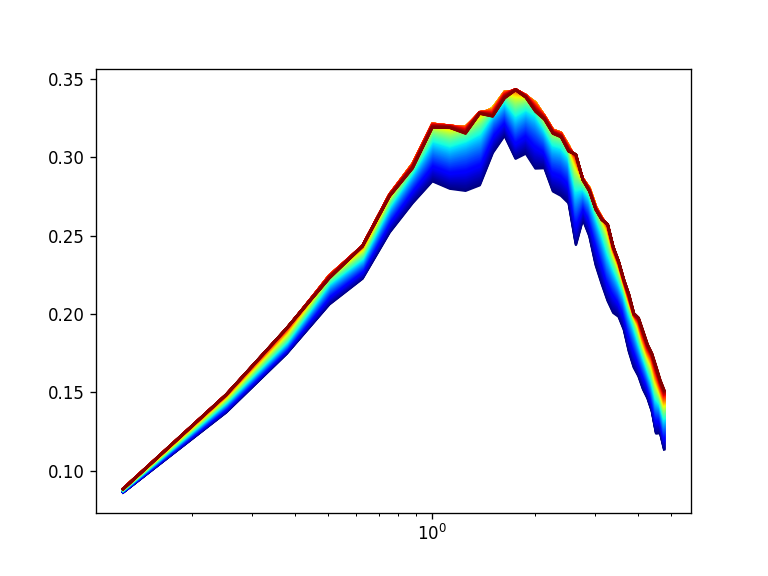

In [6]:
## Plot a range of linear powers
model=median_model
delta_ps=np.linspace(median_Delta2_p-0.15,median_Delta2_p+0.15,200)
k=GP_EMU.arxiv.data[0]["k_Mpc"][1:]
plt.figure()
for aa in range(len(delta_ps)):
    model["Delta2_p"]=delta_ps[aa]
    col = plt.cm.jet((aa)/(len(delta_ps)))
    pred,err=GP_EMU.predict(model)
    pred=np.hstack(pred)
    plt.semilogx(k[:len(pred)],pred*k[:len(pred)],color=col)



<IPython.core.display.Javascript object>


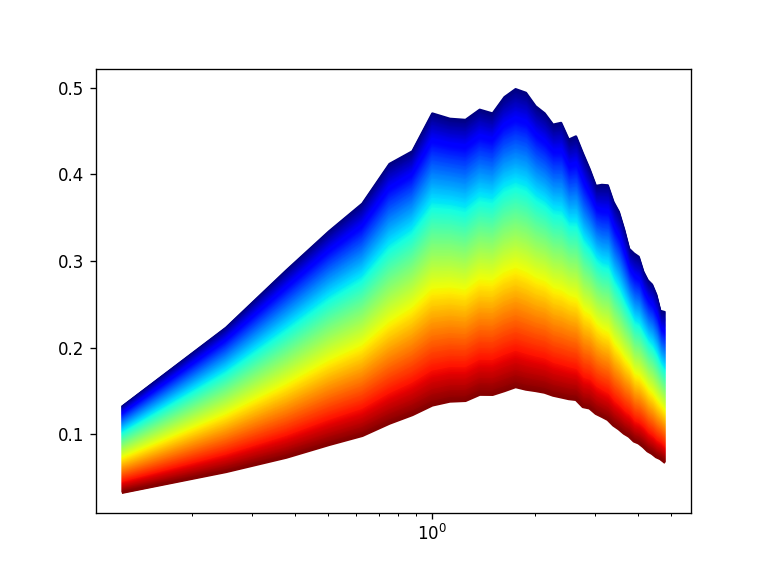

In [7]:
## Plot a range of mean fluxes
model=median_model
mfs=np.linspace(median_mF-0.2,median_mF+0.2,200)

plt.figure()
for aa in range(len(mfs)):
    model["mF"]=mfs[aa]
    col = plt.cm.jet((aa)/(len(mfs)))
    pred,err=GP_EMU.predict(model)
    pred=np.hstack(pred)
    plt.semilogx(k[:len(pred)],pred*k[:len(pred)],color=col)